# Customer Segmentation Analysis Using K-Means Clustering

________________________

## Overview
This project leverages the K-Means clustering algorithm to segment customers based on their annual income and spending score, a critical task in targeted marketing and customer relationship management. Using a dataset from a mall, this analysis categorizes customers into clusters that highlight different spending behaviors and income levels. The project uses data visualization to identify an optimal number of clusters, known as the "elbow point," and visualizes each cluster with its centroid. This approach allows businesses to better understand customer profiles and tailor strategies to each segment's needs.

## The project code:

### 1. Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

### 2. Data Collection & Analysis

#### a- Loading the data from csv file to a Pandas DataFrame:


In [2]:
# loading the data from csv file to a Pandas DataFrame
customer_data = pd.read_csv('/kaggle/input/mall-customers/Mall_Customers.csv')

#### b- Showing first 5 rows of the dataframe:


In [3]:
# first 5 rows in the dataframe
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### c- Showing number of rows and columns:

In [4]:
# finding the number of rows and columns
customer_data.shape

(200, 5)

#### d- Getting some informations about the dataset:


In [5]:
# getting some informations about the dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


#### e- Checking for missing values:


In [6]:
# checking for missing values
customer_data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### 3. Data Preprocessing

#### a- Choosing the Annual Income & Spending Score columns:

In [7]:
X = customer_data.iloc[:,[3,4]].values

In [8]:
print(X[:5])

[[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]]


#### b- Choosing the number of clusters:

Finding wcss value for different number of clusters:

In [9]:
# finding wcss value for different number of clusters

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

#### c- Plotting the Elbow Curve:

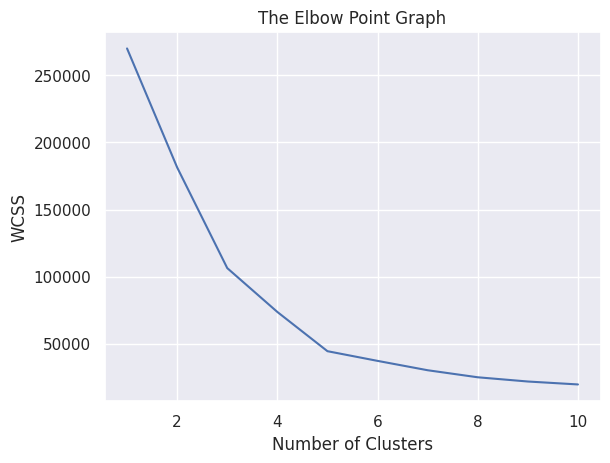

In [10]:
# plot an elbow graph

sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Optimum Number of Clusters = 5

### 4. Model building

#### a- Training the k-Means Clustering Model

In [11]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


#### b- Getting the centroids:
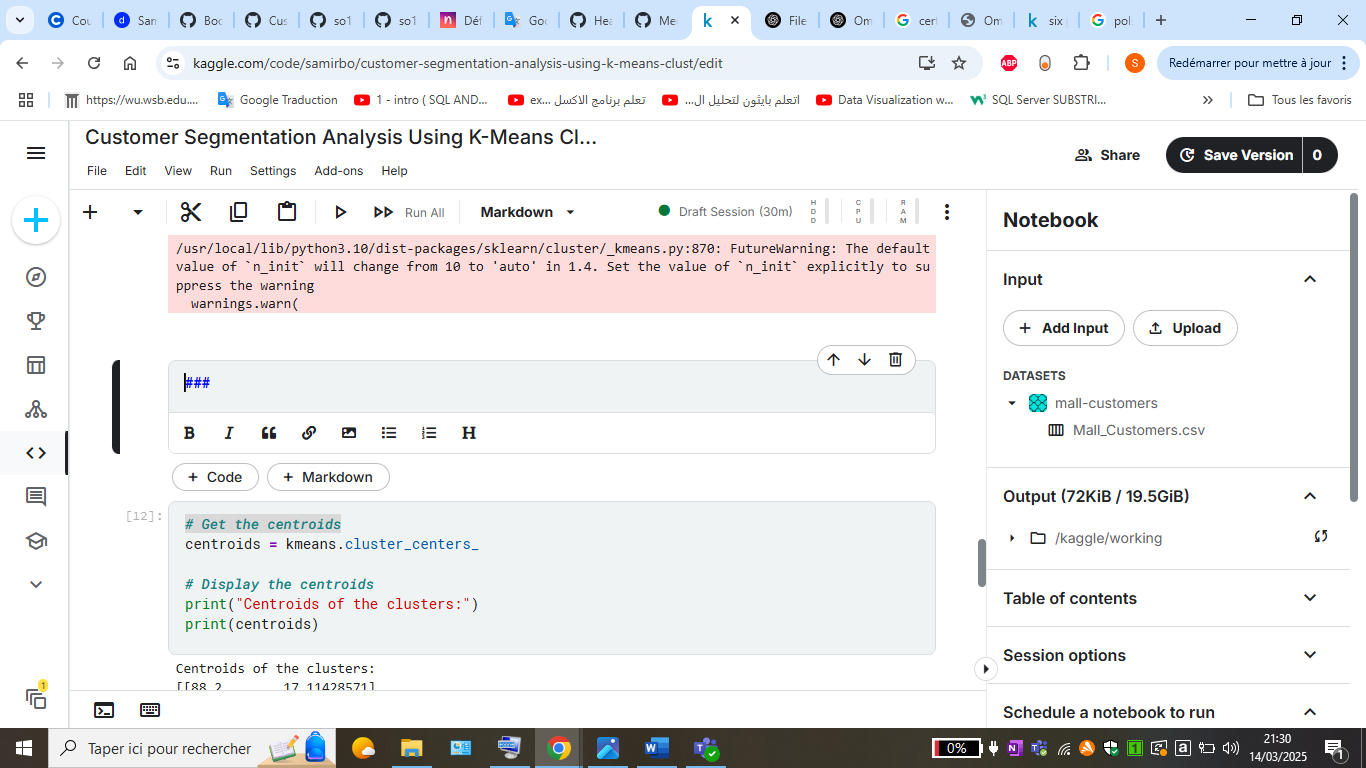

In [12]:
# Get the centroids
centroids = kmeans.cluster_centers_

# Display the centroids
print("Centroids of the clusters:")
print(centroids)

Centroids of the clusters:
[[88.2        17.11428571]
 [55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [26.30434783 20.91304348]]


#### c- Visualizing all the Clusters:

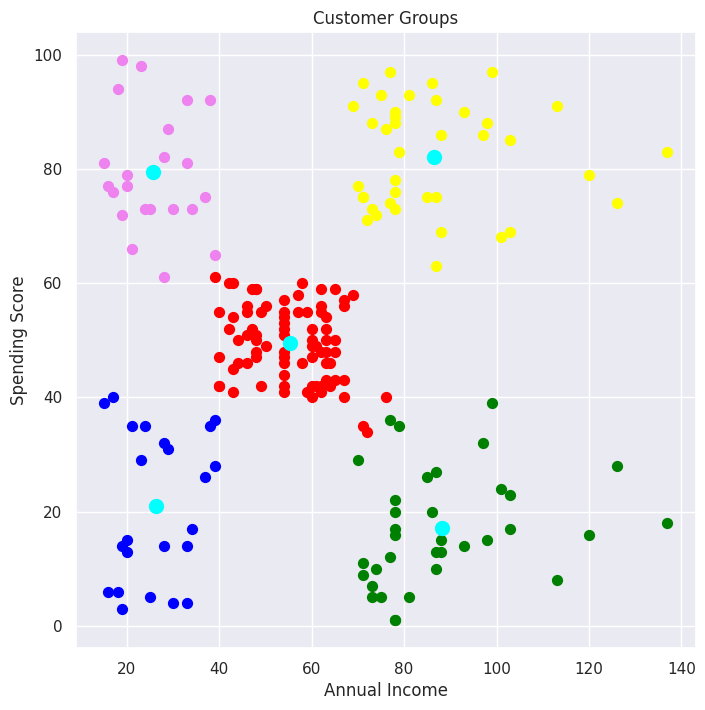

In [13]:
# plotting all the clusters and their Centroids

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

#### d- Case scenario:

In [14]:
# Example new dcustomer 
new_customer_data = [[30, 70]]  # A customer with values for features Annual Income and Spending Score

# Predict the cluster for the new data point
predicted_cluster = kmeans.predict(new_customer_data)

print(f"The new customer belongs to Cluster: {predicted_cluster[0]}")


The new customer belongs to Cluster: 3


_________________________
## Conclusion
This customer segmentation analysis effectively categorizes customers into five distinct groups, each representing a unique profile of income level and spending score. Visualizing these clusters provides a clear representation of customer types, which is valuable for personalized marketing strategies. For example, clusters can identify high-income, high-spending customers for premium services or low-income, low-spending customers for budget-oriented promotions. This analysis offers a foundation for customer-centric decision-making, though further refinement and additional features could enhance segmentation accuracy in future applications. 